In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'yacht_hydrodynamics'
shapes = {
    'S': (5,4,2),
    'V2': (3,)
}
epochs = 200
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([6], [1])


### S(X,X,X)

Average elapsed k-fold validation time: 47.81577 sec
Last measures: [0.0727599635720253, 0.07236116379499435, 0.06498252600431442, 0.09345143288373947, 0.06554803252220154, 0.0016712646465748549, 0.047405242919921875, 0.09611203521490097, 0.06525899469852448, 0.0022711139172315598, 0.050958871841430664, 0.04740520194172859, 0.09611203521490097, 0.0015189681435003877, 0.10086142271757126, 0.0727599635720253, 0.0005982016446068883, 0.001567379804328084, 0.09345143288373947, 0.06554777175188065, 0.0509527251124382, 0.07236116379499435, 0.06498268991708755, 0.001454332610592246, 0.10086142271757126, 0.05095300450921059, 0.07236116379499435, 0.09611203521490097, 0.06525899469852448, 0.10086142271757126]
Loss history average: [0.07990637 0.07874886 0.07768443 0.07671511 0.07584224 0.07506428
 0.07437785 0.0737785  0.07326142 0.07282159 0.07245225 0.07214695
 0.071898   0.07169627 0.07153111 0.07139182 0.07126959 0.07115835
 0.07105402 0.0709532  0.07085277 0.07074929 0.07063887 0.07051718
 0

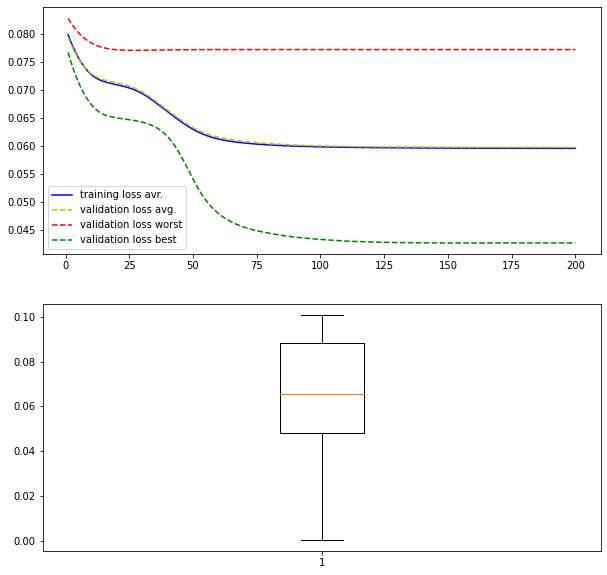

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 53.40914 sec
Last measures: [0.0727599635720253, 0.04740558937191963, 0.06498294323682785, 0.09345143288373947, 0.0655476301908493, 0.0727599635720253, 0.07236116379499435, 0.09611203521490097, 0.09345143288373947, 0.0008075422956608236, 0.0024760763626545668, 0.00272400863468647, 0.09611203521490097, 0.0038694171234965324, 0.00110745953861624, 0.0727599635720253, 0.0037682547699660063, 0.09611203521490097, 0.004501934628933668, 0.10086142271757126, 0.0727599635720253, 0.003635104512795806, 0.09611203521490097, 0.0036521158181130886, 0.10086142271757126, 0.0727599635720253, 0.0034085598308593035, 0.09611203521490097, 0.09345143288373947, 0.10086142271757126]
Loss history average: [0.08185324 0.08093717 0.08009847 0.07933813 0.07865232 0.07803862
 0.07749413 0.07701529 0.07659815 0.07623847 0.07593194 0.07567408
 0.07546013 0.07528471 0.07514255 0.07502831 0.07493663 0.07486241
 0.07480096 0.07474805 0.07469998 0.07465369 0.07460676 0.07455728
 0.

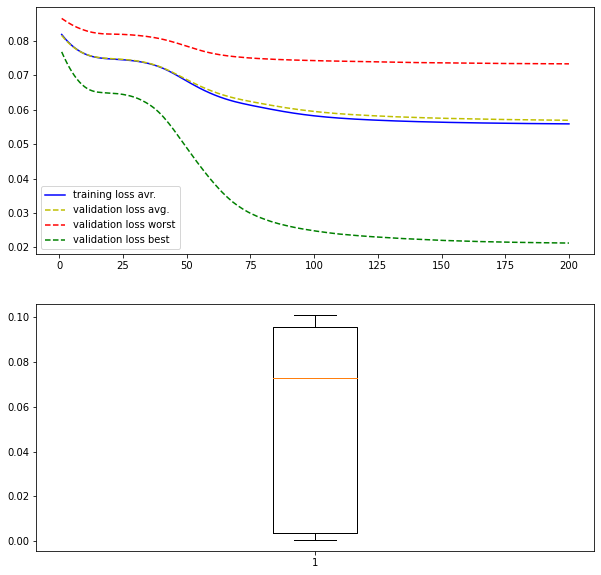

In [4]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 58.45996 sec
Last measures: [0.0727599635720253, 0.07236116379499435, 0.005893508438020945, 0.015356258489191532, 0.06553874164819717, 0.0727599635720253, 0.07236116379499435, 0.006328208837658167, 0.09345143288373947, 0.013742196373641491, 0.007769058458507061, 0.07236116379499435, 0.09611203521490097, 0.005098296795040369, 0.10086142271757126, 0.0727599635720253, 0.07236116379499435, 0.09611203521490097, 0.017422758042812347, 0.011572250165045261, 0.0727599635720253, 0.07236116379499435, 0.09611203521490097, 0.0053422595374286175, 0.01667395979166031, 0.012358731590211391, 0.004227659665048122, 0.09611203521490097, 0.09345143288373947, 0.10086142271757126]
Loss history average: [0.08226793 0.08132125 0.08043618 0.07961625 0.0788657  0.0781873
 0.07758236 0.07705073 0.07659082 0.07619973 0.07587339 0.07560681
 0.07539418 0.07522892 0.07510389 0.07501168 0.07494514 0.07489771
 0.07486371 0.07483849 0.07481847 0.07480113 0.0747848  0.07476849
 0.0

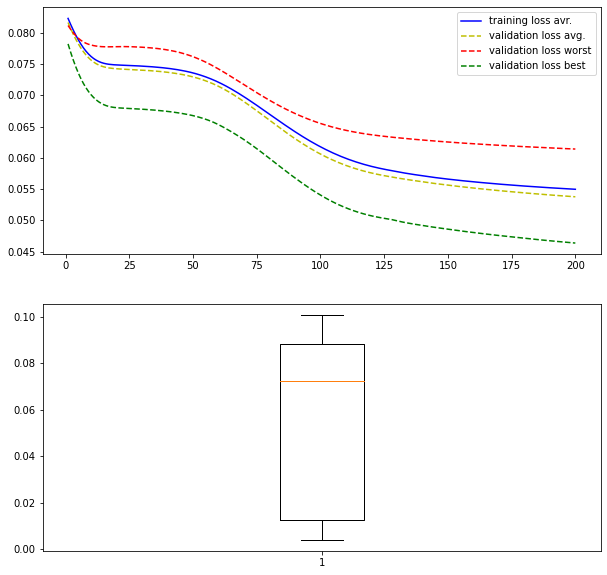

In [5]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)